In [45]:
import os
import sys
import skimage.io
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import skimage.morphology as morph
import skimage.exposure as skie

In [46]:
 skimage.io.find_available_plugins()

{'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'fits': ['imread', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'gtk': ['imshow'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection']}

In [47]:
imlibs = skimage.io.find_available_plugins()

In [48]:
import pyfits

filename = "./u12517j.fits"

hdulist = pyfits.open(filename)

In [49]:
myimage = hdulist[0].data

<ipython-input-56-b70b41ec2dc7>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(myimage))
<ipython-input-56-b70b41ec2dc7>:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(myimage))


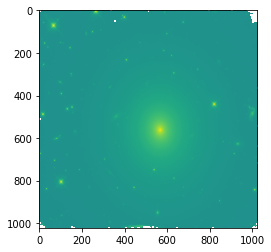

In [56]:
plt.imshow(np.log10(myimage))

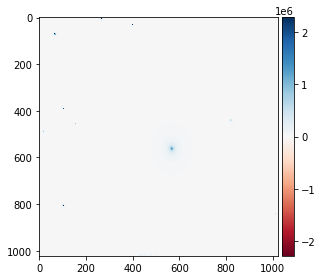

In [58]:
 skimage.io.imshow(myimage)

In [52]:
img =  pyfits.getdata(filename)

In [53]:
limg = np.arcsinh(img)
limg = limg / limg.max()
low = np.percentile(limg, 0.25)
high = np.percentile(limg, 99.5)
opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high))

In [54]:
lm = morph.local_maxima(limg)
x1, y1 = np.where(lm.T == True)
v = limg[(y1,x1)]

<ipython-input-64-4191e06595cd>:5: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(opt_img), cmap='gray')


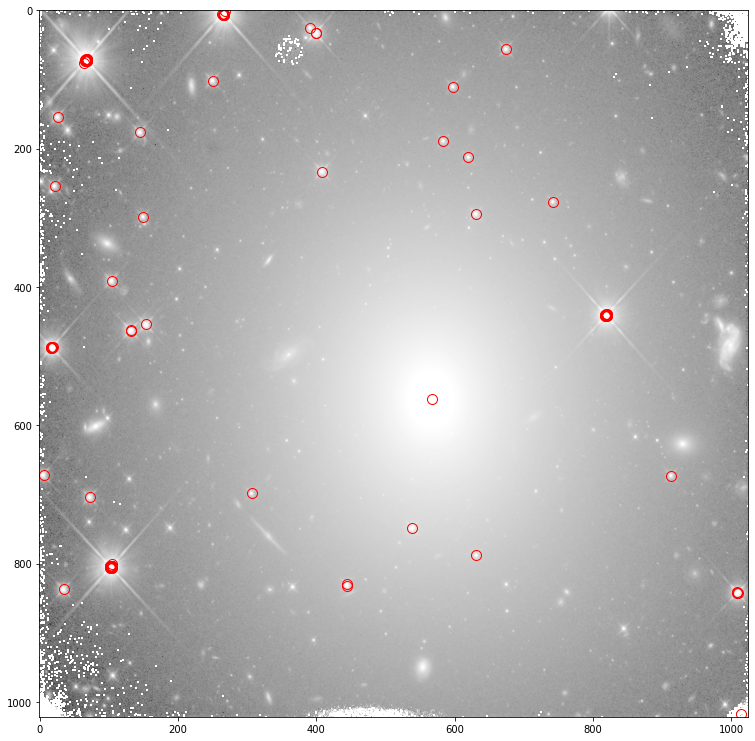

In [64]:
lim = 0.90
x2, y2 = x1[v > lim], y1[v > lim]

fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(np.log10(opt_img), cmap='gray')

ax.plot(x2,y2, 'ro', fillstyle='none', ms=10)

In [80]:
! sex {filename}

> 
----- SExtractor 2.8.6 started on 2022-12-03 at 18:53:27 with 8 threads

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for u12517j.fits
Measuring from: "Unnamed"  / 1025 x 1022 / 0 bits FLOATING POINT data
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up background map at line:  896
> Setting up background map at line:  960
> Filtering background map(s)
> Computing background d-map
>

In [69]:
!sex {filename}


> WARNING: default.sex not found, using internal defaults

> 
----- SExtractor 2.8.6 started on 2022-12-03 at 18:47:55 with 8 threads

> Setting catalog parameters

> *ERROR*: can't read default.param



In [77]:
! sex -d > default.param

In [78]:
! ls *param

default.param  param.param
